In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os
path ="C:/Users/Anindita/Desktop/INNOVATIVE PROJECT-4TH/DATASET/digits/"
files = os.listdir(path)[:10]
print(files)
classes={'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [3]:
import cv2
X=[]
Y=[]

for cl in classes:
    pth= path+cl
    for img_name in os.listdir(pth):
      img=cv2.imread(pth+"/"+img_name,0)
      X.append(img)
      Y.append(classes[cl])
      print("dataset created successfully!")

dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset created successfully!
dataset cr

In [4]:
pd.Series(Y).value_counts()

3    21762
4    21690
5    20691
8    20637
6    20601
2    20538
9    20448
1    20385
0    20250
7    19746
dtype: int64

In [5]:
X[0].shape

(28, 28)

In [6]:
print(type(X))
X=np.array(X)
Y=np.array(Y)
print(type(X))

<class 'list'>
<class 'numpy.ndarray'>


0


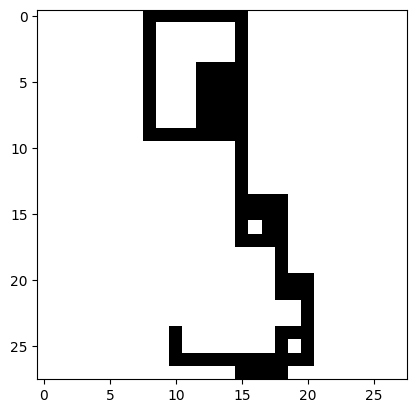

In [7]:
plt.imshow(X[206747],cmap="gray")           
print(Y[15600])    
# FOR X  
# Y SHOWS CLASS FOR FILES                  

In [8]:
X_new= X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(206748, 784)
(206748,)


In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new,Y,test_size=.20, random_state=10)

In [10]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(165398, 784) (165398,)
(41350, 784) (41350,)


In [11]:
print(xtrain.max())
print(xtest.max())
x_train=xtrain/255
x_test=xtest/255
print(x_train.max())
print(x_test.max())

255
255
1.0
1.0


In [12]:
from sklearn.decomposition import PCA

In [13]:
print (x_train.shape, x_test.shape)
pca=PCA(.98)
xtrain= pca.fit_transform(x_train)
xtest=pca.transform(x_test)
print(xtrain.shape, xtest.shape)
print(pca.n_components)
print(pca.n_features_)

(165398, 784) (41350, 784)
(165398, 515) (41350, 515)
0.98
784


c:\Users\Anindita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
ytest[:10]

array([5, 7, 6, 7, 9, 3, 6, 7, 6, 3])

In [15]:
log = LogisticRegression()
log.fit(xtrain, ytrain)

c:\Users\Anindita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
tr_pred = log.predict(xtrain)
ts_pred=log.predict(xtest)

In [17]:
print("Training Score", accuracy_score(ytrain,tr_pred))
print("Testing Score", accuracy_score(ytest,ts_pred))

Training Score 0.8944908644602716
Testing Score 0.8873035066505441


6


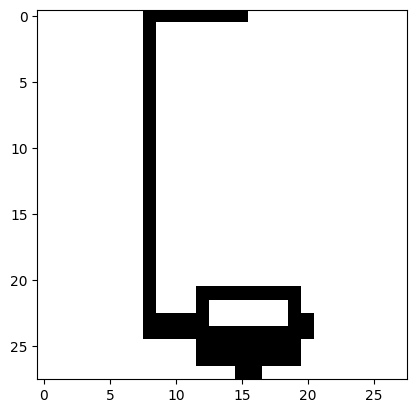

In [18]:
plt.imshow(x_test[41349].reshape(28,28), cmap='gray')
print(ytest[41349])                                      #MAX LIMIT FOR X AND Y 41349

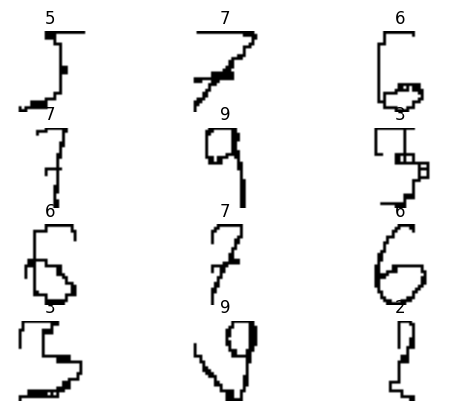

In [19]:
decode ={0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}
for i in range(12):
  plt.subplot(4,3,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title(decode[ts_pred[i]])
  plt.axis('off')

In [20]:
np.where(ts_pred!=ytest)
d = pd.DataFrame({'Actual':ytest,'Prediction':ts_pred})
d[d['Actual']!=d['Prediction']]

Actual  Prediction
33          1           7
34          2           7
36          3           5
37          7           3
39          8           9
...       ...         ...
41275       2           6
41281       3           5
41282       5           8
41293       0           6
41348       5           3

[4660 rows x 2 columns]

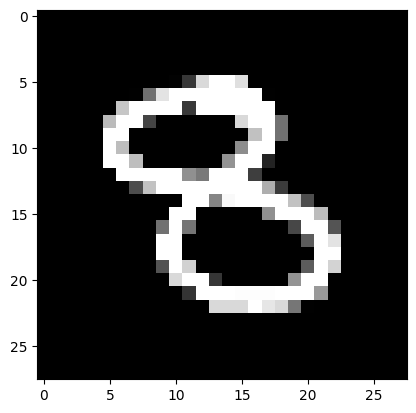

In [24]:
img= cv2.resize(cv2.imread('C:/Users/Anindita/Desktop/INNOVATIVE PROJECT-4TH/SAMPLES/sample/8/000001.png',0),(28,28))
plt.imshow(img,cmap='gray')

In [25]:
img=pca.transform(img.reshape(1,-1)/255)

In [26]:
decode[log.predict(img)[0]]

'8'